<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [8]:
import numpy as np

def compute_weighted_sums(matrices, vectors):
    total = np.zeros_like(vectors[0])
    
    for matrix, vector in zip(matrices, vectors):
        total += np.matmul(matrix, vector)
        
    return total

# Тесты
def run_tests():
    matrices = [
        np.array([[1, 1, 1], [3, 2, 1], [4, 4, 4]]),
        np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    ]
    vectors = [
        np.array([[5], [2], [3]]),
        np.array([[1], [1], [1]])
    ]
    expected = np.array([[16], [37], [64]])
    
    result = compute_weighted_sums(matrices, vectors)
    assert np.array_equal(result, expected), f"Ошибка: {result} != {expected}"
    print("Все тесты пройдены успешно!")

run_tests()

Все тесты пройдены успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [10]:
import numpy as np

def apply_threshold(matrix, threshold=0.5):
    binary_matrix = np.zeros_like(matrix, dtype=int)
    binary_matrix[matrix > threshold] = 1
    return binary_matrix

# Тесты
def run_tests():
    test_matrix = np.array([[0.4, 0.6], [0.7, 0.3]])
    expected_output = np.array([[0, 1], [1, 0]])
    
    assert np.array_equal(apply_threshold(test_matrix), expected_output)
    assert np.array_equal(apply_threshold(np.array([])), np.array([]))
    
    print('Все тесты пройдены успешно!')

run_tests()

Все тесты пройдены успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [38]:
import numpy as np

def unique_rows(mat):
    unique_rows = []
    for row in mat:
        unique_rows.append(list(set(row)))
    return unique_rows

def unique_columns(mat):
    num_rows = len(mat)
    num_cols = len(mat[0])
    unique_cols = [[] for _ in range(num_cols)]

    for i in range(num_cols):
        column = [mat[j][i] for j in range(num_rows)]
        unique_cols[i] = list(set(column))

    return unique_cols

matrix_rows = [
    [1, 2, 2, 3],
    [4, 5, 6, 6],
    [7, 8, 9, 9]
]

print(unique_rows(matrix_rows))

matrix_columns = [
    [1, 4, 7],
    [2, 5, 8],
    [2, 6, 9],
    [3, 6, 9]
]

print(unique_columns(matrix_columns))

[[1, 2, 3], [4, 5, 6], [8, 9, 7]]
[[1, 2, 3], [4, 5, 6], [8, 9, 7]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

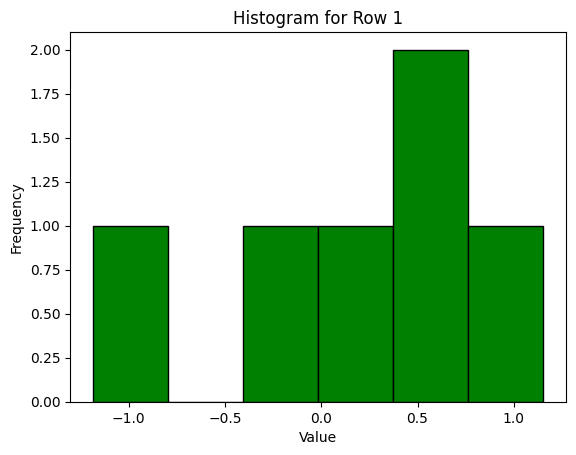

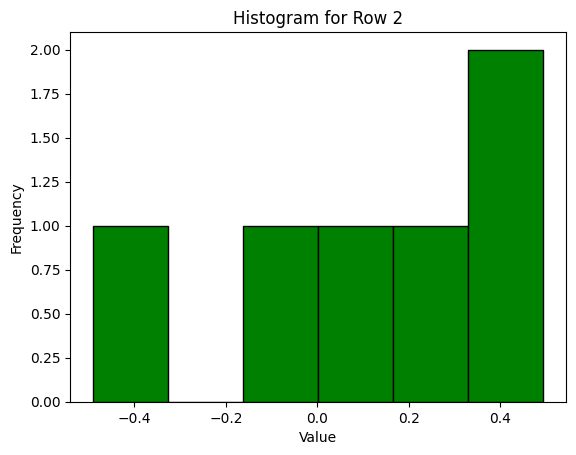

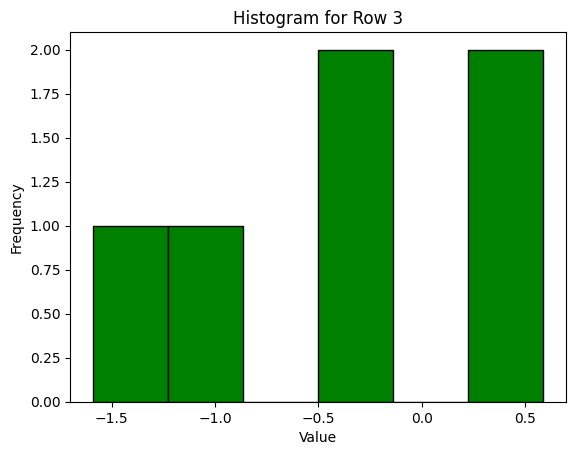

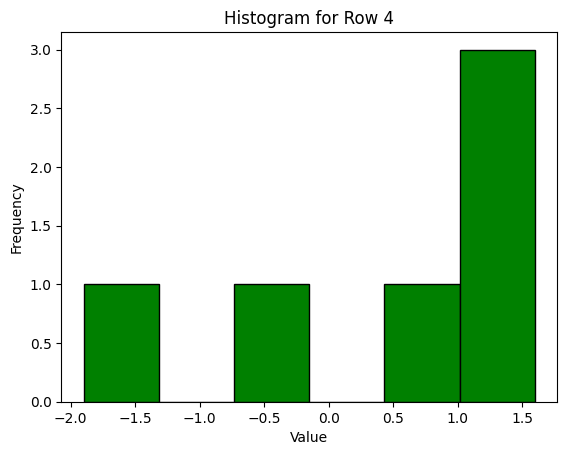

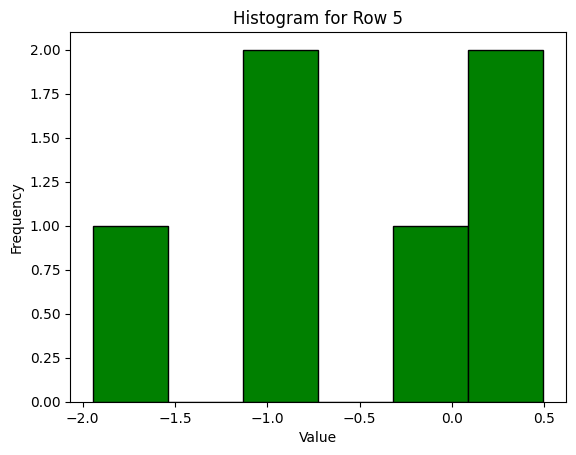

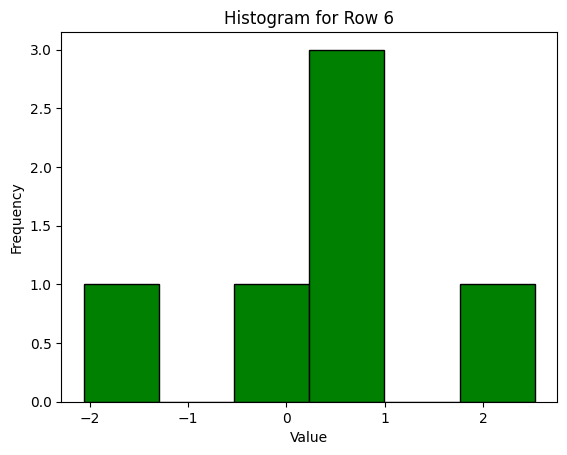

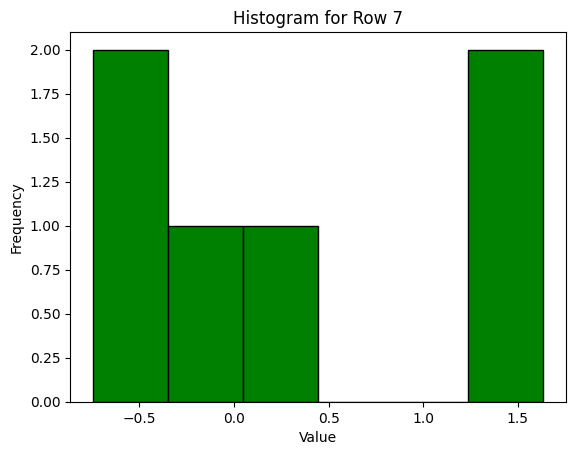

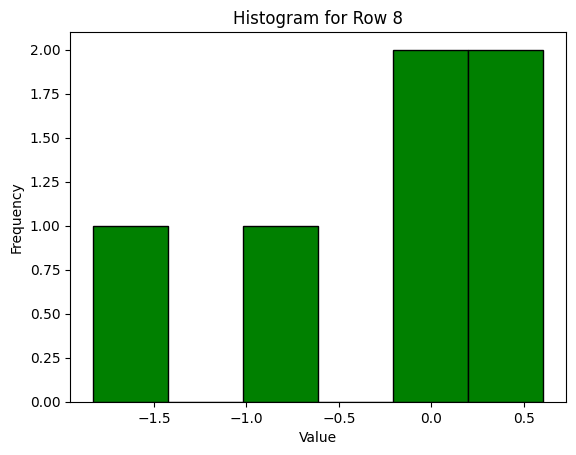

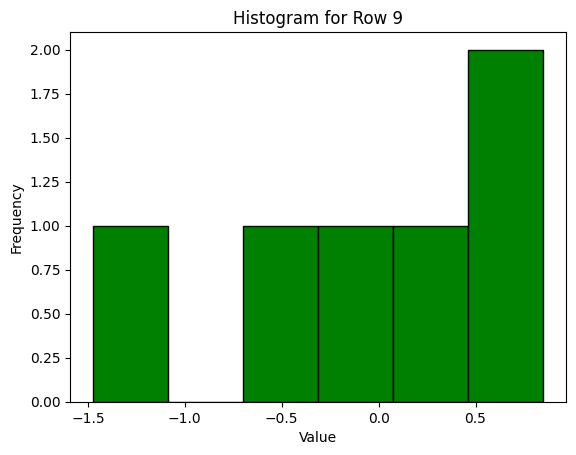

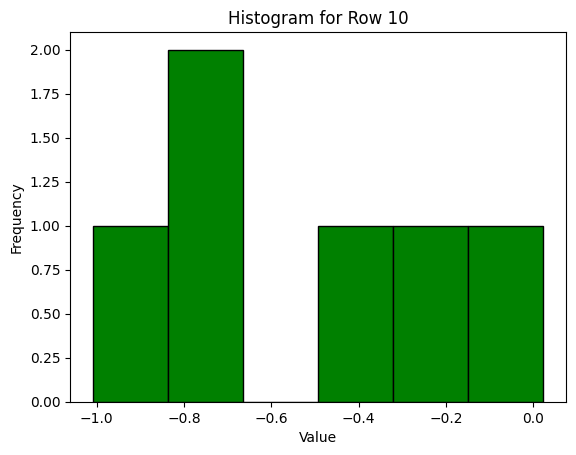

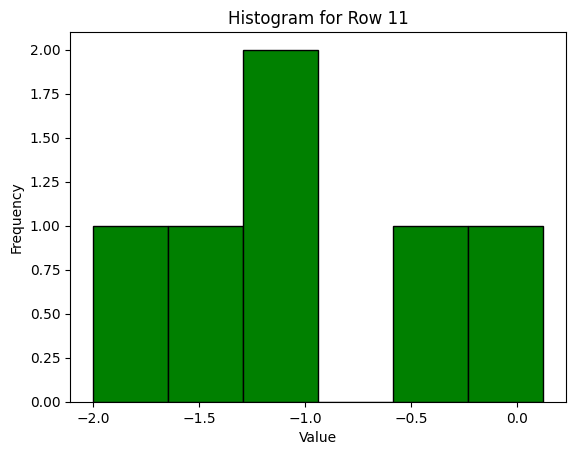

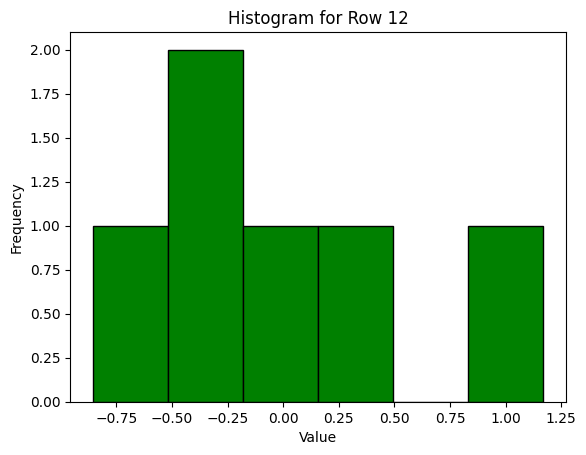

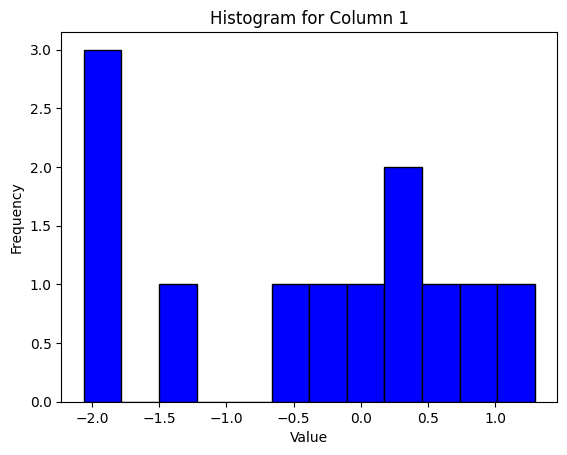

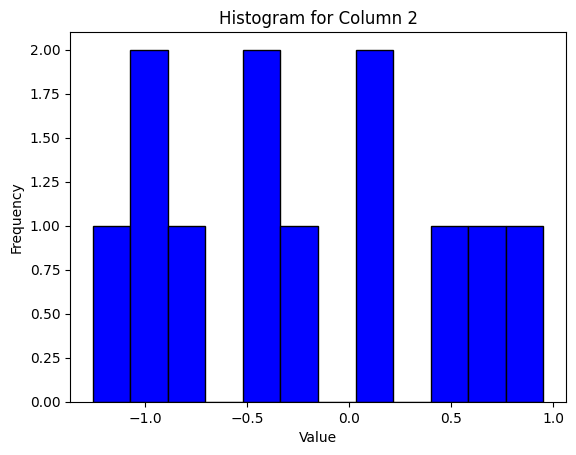

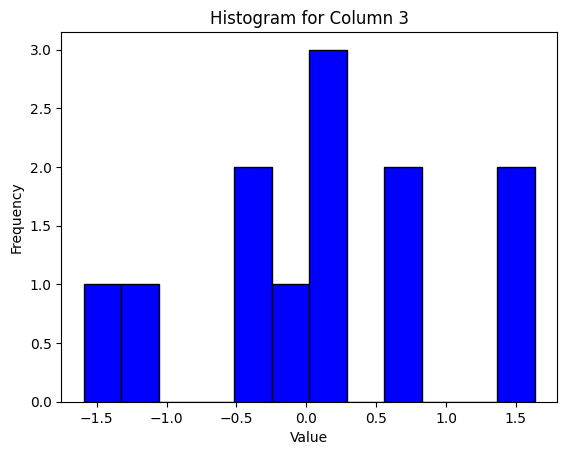

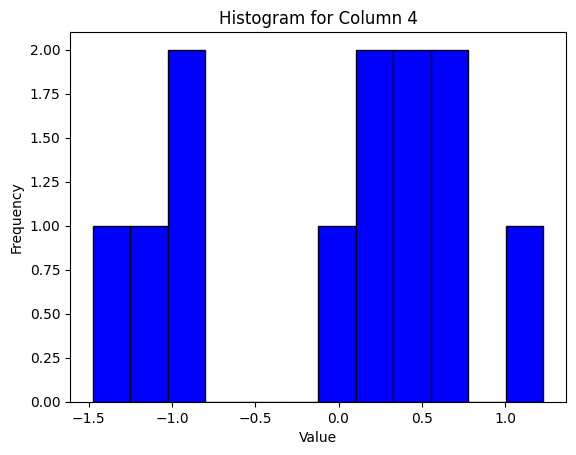

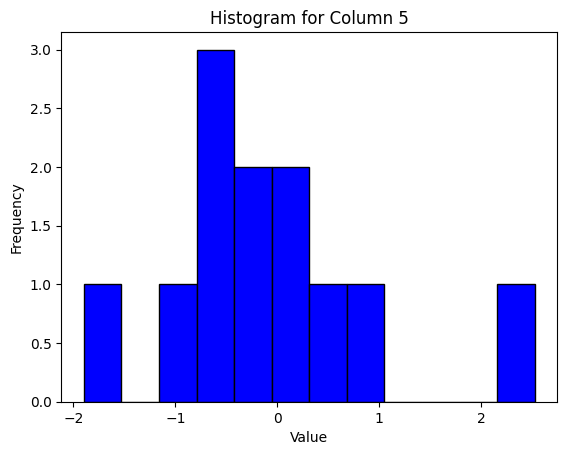

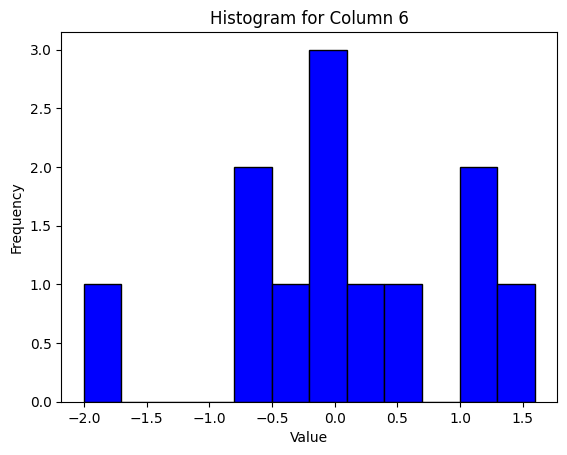

Matrix:
[[ 0.45  0.04  0.66 -1.19 -0.19  1.15]
 [-0.07 -0.49  0.26  0.49  0.49  0.05]
 [ 0.59  0.45 -1.59 -0.97 -0.41 -0.16]
 [ 0.88 -0.42  1.54  1.23 -1.9   1.6 ]
 [-1.95  0.11  0.07  0.5  -1.06 -0.73]
 [-2.06  0.95 -0.05  0.57  2.53  0.62]
 [ 1.3  -0.27  1.64  0.11 -0.7  -0.75]
 [-1.83 -0.9   0.61  0.6  -0.01  0.16]
 [ 0.21  0.59  0.07 -1.48  0.85 -0.38]
 [-0.28 -1.01 -0.49 -0.82 -0.68  0.02]
 [-1.35 -1.26 -1.18  0.12 -0.52 -2.  ]
 [-0.4  -0.86 -0.32  0.01  0.25  1.17]]
Mean for Columns:
[-0.38 -0.26  0.1  -0.07 -0.11  0.06]
Mean for Rows:
[ 0.15  0.12 -0.35  0.49 -0.51  0.43  0.22 -0.23 -0.02 -0.54 -1.03 -0.02]
Variance for Columns:
[1.23 0.44 0.84 0.66 1.12 0.91]
Variance for Rows:
[0.55 0.12 0.58 1.59 0.69 1.86 0.87 0.77 0.57 0.12 0.45 0.4 ]


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def create_random_matrix(m, n):
    return np.random.randn(m, n)

def calculate_statistics(mat):
    col_means = np.mean(mat, axis=0)
    col_variances = np.var(mat, axis=0)
    row_means = np.mean(mat, axis=1)
    row_variances = np.var(mat, axis=1)
    return col_means, row_means, col_variances, row_variances

def plot_histograms(mat):
    m, n = mat.shape
    
    for i in range(m):
        plt.figure()
        plt.hist(mat[i, :], bins=n, color='green', edgecolor='black')
        plt.title(f'Histogram for Row {i + 1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(mat[:, j], bins=m, color='blue', edgecolor='black')
        plt.title(f'Histogram for Column {j + 1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

def main(m, n):
    matrix = create_random_matrix(m, n)
    col_means, row_means, col_variances, row_variances = calculate_statistics(matrix)
    plot_histograms(matrix)
    
    return col_means, row_means, col_variances, row_variances, matrix

# Пример использования
m = 12
n = 6

col_means, row_means, col_variances, row_variances, matrix = main(m, n)

print('Matrix:')
print(np.round(matrix, 2))
print('Mean for Columns:')
print(np.round(col_means, 2))
print('Mean for Rows:')
print(np.round(row_means, 2))
print('Variance for Columns:')
print(np.round(col_variances, 2))
print('Variance for Rows:')
print(np.round(row_variances, 2))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [24]:
import numpy as np

def create_chessboard(rows, cols, value_a, value_b):
    board = np.empty((rows, cols), dtype=object)  # создаем пустую матрицу
    for i in range(rows):
        for j in range(cols):
            board[i, j] = value_a if (i + j) % 2 == 0 else value_b  # заполняем матрицу
    return board

# Тесты
def test_create_chessboard():
    rows, cols = 3, 3
    value_a, value_b = 0, 1
    expected_result = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
    np.testing.assert_array_equal(create_chessboard(rows, cols, value_a, value_b), expected_result)

    rows, cols = 2, 4
    value_a, value_b = 'X', 'O'
    expected_result = np.array([['X', 'O', 'X', 'O'], ['O', 'X', 'O', 'X']])
    np.testing.assert_array_equal(create_chessboard(rows, cols, value_a, value_b), expected_result)

    rows, cols = 4, 2
    value_a, value_b = True, False
    expected_result = np.array([[True, False], [False, True], [True, False], [False, True]])
    np.testing.assert_array_equal(create_chessboard(rows, cols, value_a, value_b), expected_result)

    print('Все тесты пройдены успешно!')

test_create_chessboard()

Все тесты пройдены успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

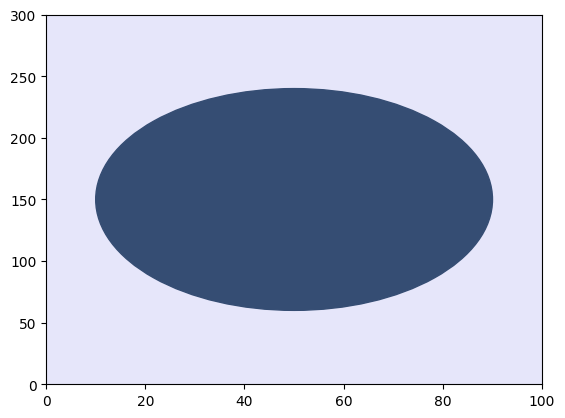

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def setup_plot(m, n, background_color):
    fig, ax = plt.subplots()
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.add_patch(patches.Rectangle((0, 0), m, n, color=background_color))
    return fig, ax

def draw_colored_rectangle(a, b, ax, rectangle_color):
    rect = patches.Rectangle(((ax.get_xlim()[1] - a) / 2, (ax.get_ylim()[1] - b) / 2), a, b, color=rectangle_color)
    ax.add_patch(rect)

def draw_colored_ellipse(a, b, ax, ellipse_color):
    a *= 2
    b *= 2
    ellipse = patches.Ellipse((ax.get_xlim()[1] / 2, ax.get_ylim()[1] / 2), a, b, color=ellipse_color)
    ax.add_patch(ellipse)

def draw_shapes(a, b, m, n, rectangle_color, ellipse_color, background_color):
    fig, ax = setup_plot(m, n, background_color)
    draw_colored_rectangle(a, b, ax, rectangle_color)
    draw_colored_ellipse(a, b, ax, ellipse_color)
    plt.show()

# Тесты
a = 40
b = 90
m = 100
n = 300
rectangle_color = '#6767e0'
ellipse_color = '#354d73'
background_color = '#e6e6fa'

draw_shapes(a, b, m, n, rectangle_color, ellipse_color, background_color)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [27]:
import numpy as np

def analyze_time_series(time_series, window_size):
    # Вычисление базовых статистических характеристик
    average = np.mean(time_series)
    var = np.var(time_series)
    std_dev = np.std(time_series)

    # Находим локальные минимумы и максимумы
    local_minima = []
    local_maxima = []
    
    for i in range(1, len(time_series) - 1):
        if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append(time_series[i])
        elif time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append(time_series[i])

    # Рассчитываем скользящее среднее
    smoothed_series = np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')

    return average, var, std_dev, local_minima, local_maxima, smoothed_series

# Пример использования
time_series_data = np.array([2, 4, 5, 6, 5, 1, 7, 3, 7, 9])
window_size = 3

mean, variance, std_deviation, local_mins, local_maxs, smoothed_data = analyze_time_series(time_series_data, window_size)

# Вывод результатов
print('Среднее значение:', mean)
print('Дисперсия:', variance)
print('Стандартное отклонение:', std_deviation)
print('Локальные максимумы:', local_maxs)
print('Локальные минимумы:', local_mins)
print('Скользящее среднее:', smoothed_data)

Среднее значение: 4.9
Дисперсия: 5.49
Стандартное отклонение: 2.3430749027719964
Локальные максимумы: [np.int64(6), np.int64(7)]
Локальные минимумы: [np.int64(1), np.int64(3)]
Скользящее среднее: [3.66666667 5.         5.33333333 4.         4.33333333 3.66666667
 5.66666667 6.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [28]:
import numpy as np

def generate_one_hot(labels, class_count):
    one_hot_encoded = np.zeros((len(labels), class_count), dtype=int)
    for idx, label in enumerate(labels):
        if label < class_count:  
            one_hot_encoded[idx, label] = 1
            
    return one_hot_encoded

labels = [0, 2, 3, 0]
num_classes = 4
one_hot_result = generate_one_hot(labels, num_classes)

print(one_hot_result)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
